# PROYECTO FINAL

# Camiones DataSet




En la logística, el tiempo de viaje de un cargamento desde el punto de carga hasta el punto de descarga es crucial para la planificación de las operaciones. Los retrasos pueden generar costos adicionales, problemas en la cadena de suministro y afectar negativamente la satisfacción del cliente.

**¿Cuál es el problema (aplicación) que abordará?**

En la logística, es difícil predecir con precisión cuánto tiempo tomará un viaje desde el punto de carga hasta el punto de descarga debido a la variabilidad en factores como tráfico, condiciones climáticas, eficiencia en procesos de carga/descarga, esto es crucial para la planificación de las operaciones. Los retrasos pueden generar costos adicionales, problemas en la cadena de suministro y afectar negativamente la satisfacción del cliente

**¿Por que es importante?**

La incapacidad de predecir con precisión estos tiempos puede llevar a retrasos inesperados, aumento de costos, problemas en la cadena de suministro, y baja satisfacción del cliente. Estos problemas impactan negativamente en la eficiencia operativa y la rentabilidad de las empresas logísticas.

Revisión Bibliográfica:

UNIVERSIDAD DE CHILE FACULTAD DE CIENCIAS FÍSICAS Y MATEMÁTICAS DEPARTAMENTO DE INGENIERÍA CIVIL INDUSTRIAL: OPTIMIZACIÓN DE DISTRIBUCIÓN LOGÍSTICA DE PRIMERA MILLA PARA MARKETPLACE EN RETAIL:

El trabajo implica la creación de un modelo matemático que toma en cuenta varias restricciones, como la capacidad de los camiones y las ventanas horarias para las recogidas. Se utilizan algoritmos de optimización y técnicas de metaheurísticas para generar soluciones rápidas y eficaces. El modelo se implementa en una plataforma web que permite a los planificadores de rutas (planners) visualizar y ajustar las rutas generadas.

UNIVERSIDAD DE CHILE FACULTAD DE CIENCIAS FÍSICAS Y MATEMÁTICAS DEPARTAMENTO DE INGENIERÍA CIVIL INDUSTRIAL:MODELO DE PREDICCIÓN Y ESTIMACIÓN DE TIEMPOS DE TRASLADO ENTRE DOS PUNTOS UTILIZANDO DATOS DE GPS
El modelo propuesto se basa en el uso de Random Forest, un algoritmo de machine learning programado en Python. Este modelo se entrena con datos históricos de GPS tanto de los vehículos registrados en la plataforma de SimpliRoute como de Transantiago, lo que permite predecir los tiempos de traslado con una precisión del 96,88%.

CONCLUSION:

 Este algoritmo fue elegido por su robustez en escenarios donde existen muchas variables que podrían influir en la salida (en este caso, el tiempo de traslado). Random Forest es especialmente útil para evitar el sobreajuste, ya que combina múltiples árboles de decisión, y esto permitió obtener una estimación confiable de los tiempos de traslado con datos históricos complejos, Random Forest fue clave en la predicción de tiempos de traslado, y su precisión le permitió superar las limitaciones y los costos de usar APIs comerciales como la de Google Maps.


# LIBRERIAS

In [1]:
import graphviz
from graphviz import Digraph
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [2]:
a = np.array([[0.84,0.53],[-0.53,0.84]])
np.linalg.eig(a)

EigResult(eigenvalues=array([0.84+0.53j, 0.84-0.53j]), eigenvectors=array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        +0.70710678j, 0.        -0.70710678j]]))

# DIAGRAMA ESQUEMATICO

In [5]:
# Crear una instancia del grafo dirigido
dot = Digraph(comment='Proceso de Predicción de Tiempos de Viaje')

# Estilo general de los nodos
node_style = {'shape': 'box', 'style': 'filled', 'color': 'lightblue', 'fontname': 'Helvetica'}

# Añadir nodos principales
dot.node('A', 'Recopilación de Datos', **node_style)
dot.node('B', 'Preprocesamiento de Datos', **node_style)
dot.node('C', 'Selección del Modelo', **node_style)
dot.node('D', 'Entrenamiento del Modelo', **node_style)
dot.node('E', 'Evaluación del Modelo', **node_style)
dot.node('F', 'Analísis de resultados', **node_style)

# Añadir sub-etapas para Preprocesamiento de Datos con el mismo estilo
dot.node('B1', 'Limpieza de Datos', **node_style)
dot.node('B2', 'Transformación de Variables', **node_style)
dot.node('B3', 'Creación de Características', **node_style)

# Añadir subtareas de Limpieza de Datos
dot.node('B1.1', 'Eliminación o imputación de Datos Faltantes', **node_style)
dot.node('B1.2', 'Corrección de Datos Inconsistentes', **node_style)
dot.node('B1.3', 'Detección y Manejo de Outliers', **node_style)
dot.node('B1.4', 'Validación de Relaciones entre Datos', **node_style)

# Conectar subtareas de Limpieza de Datos
dot.edge('B1', 'B1.1')
dot.edge('B1.1', 'B1.2')
dot.edge('B1.2', 'B1.3')
dot.edge('B1.3', 'B1.4')

# Añadir subtareas de Transformación de Variables
dot.node('B2.1', 'Codificación de Variables Categóricas', **node_style)
dot.node('B2.2', 'Normalización/Estandarización', **node_style)
dot.node('B2.3', 'Creación de Variables Derivadas', **node_style)
dot.node('B2.4', 'Transformación de Variables de Tiempo', **node_style)

# Conectar subtareas de Transformación de Variables
dot.edge('B2', 'B2.1')
dot.edge('B2.1', 'B2.2')
dot.edge('B2.2', 'B2.3')
dot.edge('B2.3', 'B2.4')

# Conectar sub-etapas con la siguiente etapa
dot.edge('B3', 'C')

# Conectar los nodos principales
dot.edge('A', 'B')
dot.edge('B', 'B1')
dot.edge('B', 'B2')
dot.edge('B', 'B3')
dot.edge('C', 'D')
dot.edge('D', 'E')
dot.edge('E', 'F')

# Renderizar y guardar el diagrama como imagen PNG
dot.render('proceso_prediccion_tiempos_viaje_uniforme', format='png', cleanup=True)

# Mostrar la imagen en el notebook
Image(filename='proceso_prediccion_tiempos_viaje_uniforme.png')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# ANALISIS EXPLORATORIO

In [3]:
df = pd.read_csv(r"C:\Users\euplo\Downloads\RemesasRNDC_202301 (1) (1).txt", delimiter='|', encoding='latin-1')
df.head()

,AÑOMES,NATURALEZA,COD_PRODUCTO,PRODUCTO,CANTIDAD,UNID_MEDIDA,FECHASALIDACARGUE,HORA_SALIDA_CARGUE,FECHALLEGADADESCARGUE,HORA_LLEGADA_DESCARGUE,...,HORAS_ESPERA_DESCARGUE,HORAS_DESCARGUE,VALOR_PACTADO,VALOR_PAGADO,CANTIDAD_REMESAS_VIAJE,EMPRESA_TRANSPORTE,PLACA,CONFIGURACION,CONDUCTOR,GPS
0,202301,Carga Normal,008708,VEHÍCULOS AUTOMÓVILES; TRACTORES; CICLOS Y DEM...,"3,604",Kilogramos,26/01/23,17:00,27/01/23,09:25,...,1.32,0.43,"1,300,000","1,300,000",1,524,203057,2,41,NaN
1,202301,Carga Normal,003407,JABONES; AGENTES DE SUPERFICIE ORGÁNICOS; PREP...,"7,000",Kilogramos,05/01/23,01:45,05/01/23,11:00,...,0.98,4.95,"1,191,700","1,191,700",1,524,203057,2,41,NaN
2,202301,Carga Normal,003407,JABONES; AGENTES DE SUPERFICIE ORGÁNICOS; PREP...,"5,000",Kilogramos,24/01/23,20:00,25/01/23,12:45,...,0.23,2.00,"946,700","946,700",1,524,203057,2,41,NaN
3,202301,Carga Normal,007323,MANUFACTURAS DE FUNDICIÓN DE HIERRO O DE ACERO...,"7,000",Kilogramos,02/01/23,17:00,03/01/23,03:27,...,0.63,11.35,0,0,1,2148,1400733,2S2,45,NaN
4,202301,Carga Normal,007323,MANUFACTURAS DE FUNDICIÓN DE HIERRO O DE ACERO...,"7,000",Kilogramos,05/01/23,17:00,06/01/23,03:15,...,0.75,11.25,0,0,1,2148,1400733,2S3,45,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960231 entries, 0 to 960230
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AÑOMES                  960231 non-null  int64  
 1   NATURALEZA              955897 non-null  object 
 2   COD_PRODUCTO            960231 non-null  object 
 3   PRODUCTO                960231 non-null  object 
 4   CANTIDAD                960231 non-null  object 
 5   UNID_MEDIDA             955897 non-null  object 
 6   FECHASALIDACARGUE       960231 non-null  object 
 7   HORA_SALIDA_CARGUE      960231 non-null  object 
 8   FECHALLEGADADESCARGUE   960231 non-null  object 
 9   HORA_LLEGADA_DESCARGUE  960231 non-null  object 
 10  CODIGO_CARGUE           960231 non-null  int64  
 11  CARGUE                  960231 non-null  object 
 12  CODIGO_DESCARGUE        960231 non-null  int64  
 13  DESCARGUE               960175 non-null  object 
 14  HORAS_VIAJE         

# PREPROCESAMIENTO DE DATOS

In [5]:
df['GPS'].unique()

array([nan, 'SI'], dtype=object)

In [6]:
# Crear una instancia del LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el LabelEncoder a la columna 'GPS'
df['GPS'] = label_encoder.fit_transform(df['GPS'])

In [7]:
#Eliminar filas (samples) duplicadas
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df = df.drop_duplicates()

number of duplicate rows:  (54526, 27)


In [8]:
#valores nulos
print(df.isnull().sum())

AÑOMES                       0
NATURALEZA                4272
COD_PRODUCTO                 0
PRODUCTO                     0
CANTIDAD                     0
UNID_MEDIDA               4272
FECHASALIDACARGUE            0
HORA_SALIDA_CARGUE           0
FECHALLEGADADESCARGUE        0
HORA_LLEGADA_DESCARGUE       0
CODIGO_CARGUE                0
CARGUE                       0
CODIGO_DESCARGUE             0
DESCARGUE                   56
HORAS_VIAJE                  0
HORAS_ESPERA_CARGUE          0
HORAS_CARGUE                 0
HORAS_ESPERA_DESCARGUE       0
HORAS_DESCARGUE              0
VALOR_PACTADO                0
VALOR_PAGADO                 0
CANTIDAD_REMESAS_VIAJE       0
EMPRESA_TRANSPORTE           0
PLACA                        0
CONFIGURACION                0
CONDUCTOR                    0
GPS                          0
dtype: int64


In [9]:
df = df.dropna()
df.isnull().sum()

AÑOMES                    0
NATURALEZA                0
COD_PRODUCTO              0
PRODUCTO                  0
CANTIDAD                  0
UNID_MEDIDA               0
FECHASALIDACARGUE         0
HORA_SALIDA_CARGUE        0
FECHALLEGADADESCARGUE     0
HORA_LLEGADA_DESCARGUE    0
CODIGO_CARGUE             0
CARGUE                    0
CODIGO_DESCARGUE          0
DESCARGUE                 0
HORAS_VIAJE               0
HORAS_ESPERA_CARGUE       0
HORAS_CARGUE              0
HORAS_ESPERA_DESCARGUE    0
HORAS_DESCARGUE           0
VALOR_PACTADO             0
VALOR_PAGADO              0
CANTIDAD_REMESAS_VIAJE    0
EMPRESA_TRANSPORTE        0
PLACA                     0
CONFIGURACION             0
CONDUCTOR                 0
GPS                       0
dtype: int64

In [10]:
# Mostrar el número de valores únicos en cada columna
print("\nValores únicos por columna:")
print(df.nunique())


Valores únicos por columna:
AÑOMES                         1
NATURALEZA                     7
COD_PRODUCTO                1508
PRODUCTO                    1496
CANTIDAD                   26776
UNID_MEDIDA                    2
FECHASALIDACARGUE             31
HORA_SALIDA_CARGUE          1442
FECHALLEGADADESCARGUE         45
HORA_LLEGADA_DESCARGUE      1457
CODIGO_CARGUE               1351
CARGUE                      1355
CODIGO_DESCARGUE            2003
DESCARGUE                   2008
HORAS_VIAJE                14673
HORAS_ESPERA_CARGUE          831
HORAS_CARGUE                2486
HORAS_ESPERA_DESCARGUE      1838
HORAS_DESCARGUE             2792
VALOR_PACTADO              70895
VALOR_PAGADO               80238
CANTIDAD_REMESAS_VIAJE        78
EMPRESA_TRANSPORTE          1898
PLACA                     101726
CONFIGURACION                 27
CONDUCTOR                 106345
GPS                            2
dtype: int64


In [11]:
df['PRODUCTO'].unique()

array(['VEHÍCULOS AUTOMÓVILES; TRACTORES; CICLOS Y DEMÁS VEHÍCULOS TERRESTRES; SUS PARTES Y ACCESORIOS DE VEHICULOS AUTOMOVILES DE LAS PARTIDAS 8701 A 8705',
       'JABONES; AGENTES DE SUPERFICIE ORGÁNICOS; PREPARACIONES PARA LAVAR; PASTAS PARA MODELAR;  INCLUIDAS LAS PRESENTADAS PARA ENTRETENIMIENTO DE LOS NI',
       'MANUFACTURAS DE FUNDICIÓN DE HIERRO O DE ACERO ARTICULOS DE USO DOMESTICO Y SUS PARTES;  DE FUNDICION;  DE HIERRO O DE ACERO',
       ...,
       'SUSTANCIAS CORROSIVAS 2920 - 8 - LÍQUIDO CORROSIVO INFLAMABLE; N.E.P.',
       'SUSTANCIAS CORROSIVAS 2801 - 8 - COLORANTE LÍQUIDO CORROSIVO; N.E.P. o MATERIA INTERMEDIA PARA COLORAN',
       'ESTAÑO Y MANUFACTURAS DE ESTAÑO; HOJAS Y BANDAS DELGADAS;  DE ESTA?O (INCLUSO IMPRESAS O FIJADAS SOBRE PAPEL;'],
      dtype=object)

In [12]:
# Reemplaza los valores 'x' por 1 y 'y' por 0
df['UNID_MEDIDA'] = df['UNID_MEDIDA'].replace({'Kilogramos': 1, 'Galones': 0})

C:\Users\euplo\AppData\Local\Temp\ipykernel_41072\2347521806.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['UNID_MEDIDA'] = df['UNID_MEDIDA'].replace({'Kilogramos': 1, 'Galones': 0})


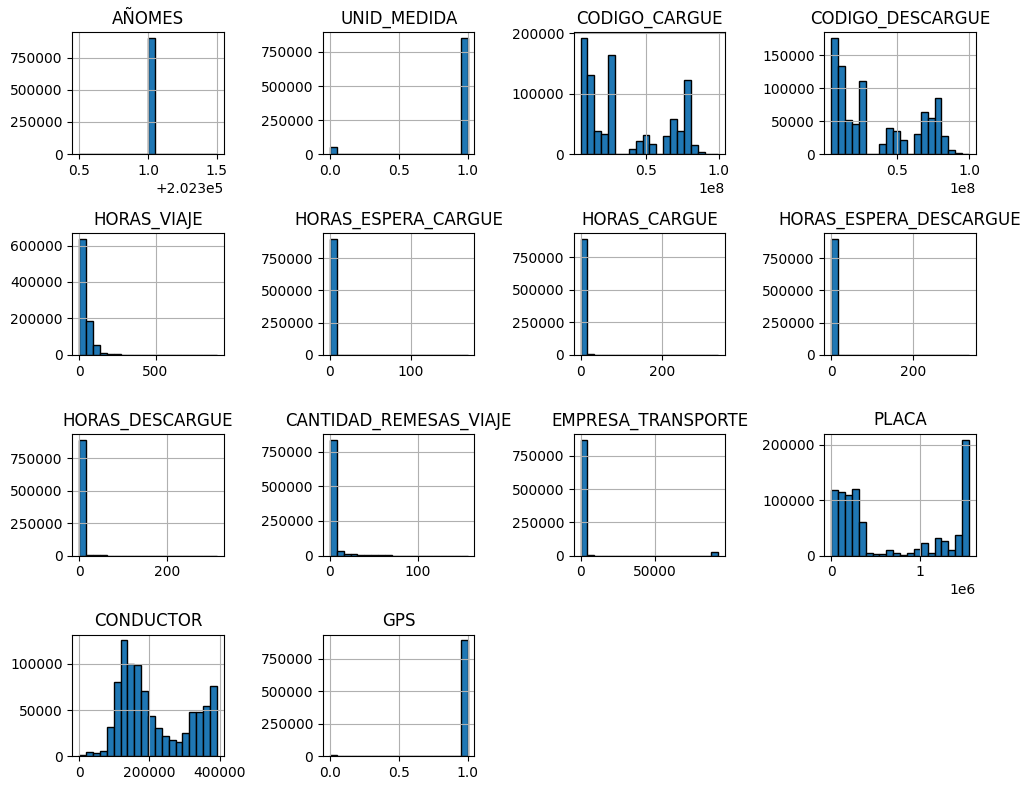

In [13]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

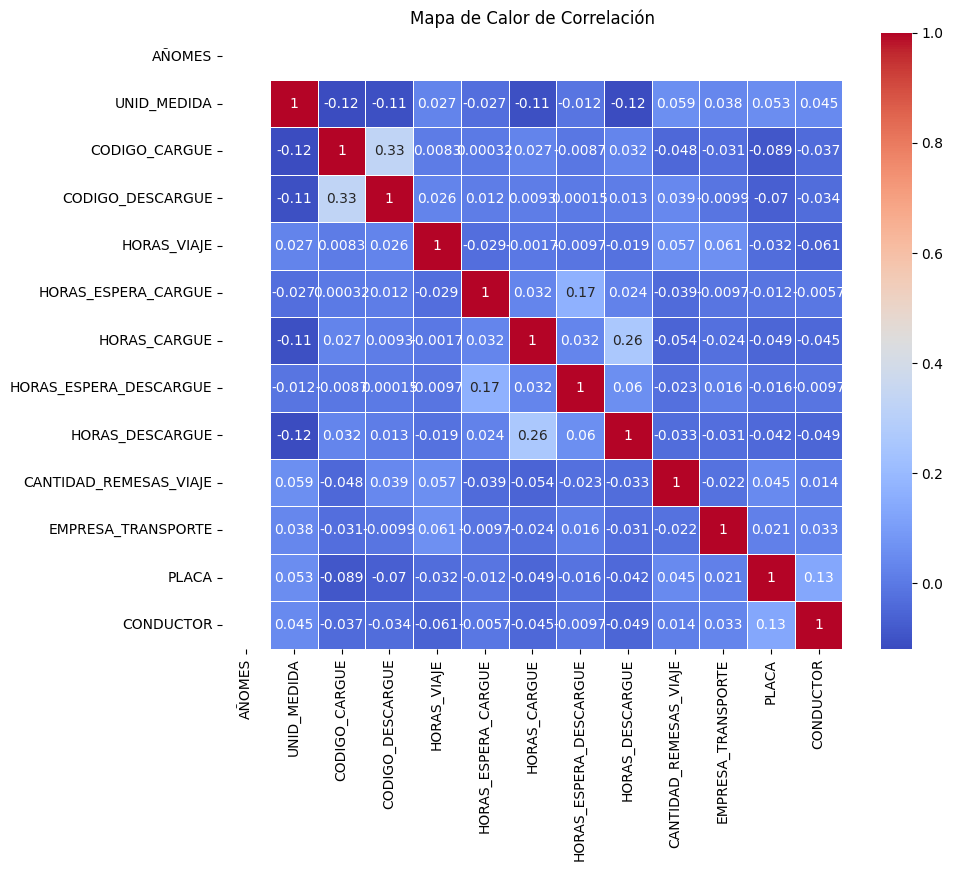

In [14]:
# Filtrar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Comprobar si hay columnas numéricas en el DataFrame
if not numerical_df.empty:
    # Mapa de calor de la correlación entre variables numéricas
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Mapa de Calor de Correlación')
    plt.show()
else:
    print("No hay columnas numéricas para mostrar un mapa de calor.")

In [15]:
# Convierte las columnas al formato fecha con manejo de errores
df['FECHASALIDACARGUE_TIMESTAMP'] = pd.to_datetime(df['FECHASALIDACARGUE'] + ' ' + df['HORA_SALIDA_CARGUE'], format='%d/%m/%y %H:%M', errors='coerce')

# Cuenta el numero de fechas que no pudieron convertirse
invalid_timestamps = df['FECHASALIDACARGUE_TIMESTAMP'].isna().sum()

print(f"Number of invalid timestamps in FECHASALIDACARGUE: {invalid_timestamps}")

Number of invalid timestamps in FECHASALIDACARGUE: 1


In [16]:
# Convierte las columnas al formato fecha con manejo de errores
df['FECHALLEGADADESCARGUE_TIMESTAMP'] = pd.to_datetime(df['FECHALLEGADADESCARGUE'] + ' ' + df['HORA_LLEGADA_DESCARGUE'], format='%d/%m/%y %H:%M', errors='coerce')

# Cuenta el numero de fechas que no pudieron convertirse
invalid_timestamps = df['FECHALLEGADADESCARGUE_TIMESTAMP'].isna().sum()

print(f"Numero de fechas invalidas en FECHALLEGADADESCARGUE: {invalid_timestamps}")

Numero de fechas invalidas en FECHALLEGADADESCARGUE: 162


In [17]:
# buscamos las filas donde la conversion de fecha no haya servido
invalid_rows = df[df['FECHASALIDACARGUE_TIMESTAMP'].isna()]

# imprimos las filas con formato invalido
print(invalid_rows[['FECHASALIDACARGUE', 'HORA_SALIDA_CARGUE']])

       FECHASALIDACARGUE HORA_SALIDA_CARGUE
535201          08/01/23              10: 0


In [18]:
# buscamos las filas donde la conversion de fecha no haya servido
invalid_rows = df[df['FECHALLEGADADESCARGUE_TIMESTAMP'].isna()]

# imprimos las filas con formato invalido
print(invalid_rows[['FECHALLEGADADESCARGUE', 'HORA_LLEGADA_DESCARGUE']])

       FECHALLEGADADESCARGUE HORA_LLEGADA_DESCARGUE
483                 25/01/23                    09:
17448               19/01/23                    17:
19199               20/01/23                    21:
26746               11/01/23                    12:
50458               27/01/23                    21:
...                      ...                    ...
862860              05/01/23                    14:
869736              03/01/23                    17:
900917              02/02/23                    14:
925454              27/01/23                    12:
925455              27/01/23                    18:

[162 rows x 2 columns]


In [19]:
#Identificamos filas con mal formato de hora
invalid_rows = df[df['HORA_LLEGADA_DESCARGUE'].str.contains(r':$', na=False)]

#imprimimos las filas que tengan hora mala
print(invalid_rows[['FECHALLEGADADESCARGUE', 'HORA_LLEGADA_DESCARGUE']])

# borramos las filas invalidas
df = df.drop(invalid_rows.index)

# Verificamos que el dataframe quede bien
print(f"New dataframe size: {df.shape}")

       FECHALLEGADADESCARGUE HORA_LLEGADA_DESCARGUE
483                 25/01/23                    09:
17448               19/01/23                    17:
19199               20/01/23                    21:
26746               11/01/23                    12:
50458               27/01/23                    21:
...                      ...                    ...
862860              05/01/23                    14:
869736              03/01/23                    17:
900917              02/02/23                    14:
925454              27/01/23                    12:
925455              27/01/23                    18:

[162 rows x 2 columns]
New dataframe size: (901210, 29)


In [20]:
#Arreglamos la hora para la fila con hora equivocada
df.loc[535201, 'HORA_SALIDA_CARGUE'] = '10:00'

df['FECHASALIDACARGUE_TIMESTAMP'] = pd.to_datetime(df['FECHASALIDACARGUE'] + ' ' + df['HORA_SALIDA_CARGUE'], format='%d/%m/%y %H:%M', errors='coerce')

#Revisamos que este bien corregida
print(df.loc[535201, ['FECHASALIDACARGUE', 'HORA_SALIDA_CARGUE', 'FECHASALIDACARGUE_TIMESTAMP']])

FECHASALIDACARGUE                         08/01/23
HORA_SALIDA_CARGUE                           10:00
FECHASALIDACARGUE_TIMESTAMP    2023-01-08 10:00:00
Name: 535201, dtype: object


In [21]:
df['FECHASALIDACARGUE'] = pd.to_datetime(df['FECHASALIDACARGUE'] + ' ' + df['HORA_SALIDA_CARGUE'], format='%d/%m/%y %H:%M')
df['FECHALLEGADADESCARGUE'] = pd.to_datetime(df['FECHALLEGADADESCARGUE'] + ' ' + df['HORA_LLEGADA_DESCARGUE'], format='%d/%m/%y %H:%M')

# Calcular tiempo de viaje
df['TRAVEL_TIME_HOURS'] = (df['FECHALLEGADADESCARGUE'] - df['FECHASALIDACARGUE']).dt.total_seconds() / 3600

#Calcular tiempo promedio de viaje dependiendo de la empresa de transporte
company_travel_times = df.groupby('EMPRESA_TRANSPORTE')['TRAVEL_TIME_HOURS'].mean().sort_values(ascending=False)
print(company_travel_times)

EMPRESA_TRANSPORTE
2131     426.057000
3027     383.000000
961      307.659420
1312     301.558170
3182     254.223404
            ...    
4330       1.023810
3850       1.000000
1049       0.897266
109        0.750000
92745      0.656250
Name: TRAVEL_TIME_HOURS, Length: 1898, dtype: float64


BORRAMOS VARIABLES IRRELEVANTES QUE NO APORTAN INFORMACIÓN A LA VARIABLE TARGET

In [22]:
#borramos variables irrelevantes para nuestro modelo
df = df.drop(columns=['PLACA','COD_PRODUCTO','CODIGO_DESCARGUE','CODIGO_CARGUE','CONDUCTOR','VALOR_PACTADO','VALOR_PAGADO','UNID_MEDIDA'])
df = df.drop(columns=['HORA_SALIDA_CARGUE', 'HORA_LLEGADA_DESCARGUE','FECHASALIDACARGUE_TIMESTAMP','FECHALLEGADADESCARGUE_TIMESTAMP','AÑOMES'])
df = df.drop(columns=['TRAVEL_TIME_HOURS','CARGUE','DESCARGUE','CONFIGURACION'])

ONE HOT ENCODING A VARIABLE CATEGORICA (DUMMIES) PARA QUE EL MODELO PUEDA LEERLA

In [23]:
#One-hot encoding a variables categoricas (dummies)
df = pd.get_dummies(df, columns=['NATURALEZA'])

In [24]:
import numpy as np

df['CANTIDAD'] = df['CANTIDAD'].str.strip().replace('###########', np.nan)
df['CANTIDAD'] = df['CANTIDAD'].str.replace(',', '').astype(float)
print(df['CANTIDAD'].isnull().sum())

1


In [25]:
#convertimos la columna empresa_transporte en la cantidad promedio de viaje que se demora la empresa
empresa_target_encoding = df.groupby('EMPRESA_TRANSPORTE')['HORAS_VIAJE'].mean()

df['EMPRESA_TRANSPORTE_ENCODED'] = df['EMPRESA_TRANSPORTE'].map(empresa_target_encoding)
df.drop('EMPRESA_TRANSPORTE', axis=1, inplace=True)
print(df['EMPRESA_TRANSPORTE_ENCODED'].head())

0    27.473379
1    27.473379
2    27.473379
3    37.815324
4    37.815324
Name: EMPRESA_TRANSPORTE_ENCODED, dtype: float64


TARGET ENCODING A VARIABLE PRODUCTO (YA QUE TIENE MAS DE 1500 CATEGORIAS, REEMPLAZAMOS A CADA PRODUCTO POR LO QUE SE DEMORA EN PROMEDIO EN LLEGAR)

In [26]:
!pip install category_encoders
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['PRODUCTO'])

df['PRODUCTO_ENCODED'] = encoder.fit_transform(df['PRODUCTO'], df['HORAS_VIAJE'])

#hacemos target encoding a variable producto, es decir, a cada categoria de producto lo reemplazamos por el promedio de horas viaje que se demora en llegar
#ya que hacer dummies incrementa demasiado la dimensionalidad


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\euplo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
#ya que no podemos tener variables datetime, extraemos el mes , dia y hora de la columna fecha
df['month_salida'] = df['FECHASALIDACARGUE'].dt.month
df['day_salida'] = df['FECHASALIDACARGUE'].dt.day
df['hour_salida'] = df['FECHASALIDACARGUE'].dt.hour

df['month_llegada'] = df['FECHALLEGADADESCARGUE'].dt.month
df['day_llegada'] = df['FECHALLEGADADESCARGUE'].dt.day
df['hour_llegada'] = df['FECHALLEGADADESCARGUE'].dt.hour

AGREGAMOS VARIABLES EXÓGENAS COMO SI ES FIN DE SEMANA O EN QUÉ PARTE DEL DÍA SALE

In [28]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'night'

df['salida_time_of_day'] = df['hour_salida'].apply(get_time_of_day)
df['llegada_time_of_day'] = df['hour_llegada'].apply(get_time_of_day)

df = pd.get_dummies(df, columns=['salida_time_of_day', 'llegada_time_of_day'])
df['findesemana_salida'] = df['FECHASALIDACARGUE'].dt.weekday >= 5
df['findesemana_llegada'] = df['FECHALLEGADADESCARGUE'].dt.weekday >= 5
df = df.drop(['FECHASALIDACARGUE', 'FECHALLEGADADESCARGUE'], axis=1)

In [29]:
#manejo de outliers

def remove_outliers(df, column_name, threshold=3):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    #return df[df[column_name] <= upper_bound]
    #return df[df[column_name] >= lower_bound]

# Aplicar la función a la columna 'HORAS_VIAJE'
df = remove_outliers(df, 'HORAS_VIAJE')
df = remove_outliers(df, 'CANTIDAD')
df = remove_outliers(df, 'HORAS_DESCARGUE')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815673 entries, 0 to 960230
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   PRODUCTO                            815673 non-null  object 
 1   CANTIDAD                            815673 non-null  float64
 2   HORAS_VIAJE                         815673 non-null  float64
 3   HORAS_ESPERA_CARGUE                 815673 non-null  float64
 4   HORAS_CARGUE                        815673 non-null  float64
 5   HORAS_ESPERA_DESCARGUE              815673 non-null  float64
 6   HORAS_DESCARGUE                     815673 non-null  float64
 7   CANTIDAD_REMESAS_VIAJE              815673 non-null  int64  
 8   GPS                                 815673 non-null  int32  
 9   NATURALEZA_Carga Extradimensionada  815673 non-null  bool   
 10  NATURALEZA_Carga Extrapesada        815673 non-null  bool   
 11  NATURALEZA_Carga Normal        

In [31]:
df.sample(1)

,PRODUCTO,CANTIDAD,HORAS_VIAJE,HORAS_ESPERA_CARGUE,HORAS_CARGUE,HORAS_ESPERA_DESCARGUE,HORAS_DESCARGUE,CANTIDAD_REMESAS_VIAJE,GPS,NATURALEZA_Carga Extradimensionada,...,day_llegada,hour_llegada,salida_time_of_day_afternoon,salida_time_of_day_morning,salida_time_of_day_night,llegada_time_of_day_afternoon,llegada_time_of_day_morning,llegada_time_of_day_night,findesemana_salida,findesemana_llegada
832009,JABONES; AGENTES DE SUPERFICIE ORGÁNICOS; PREP...,7910.0,15.0,0.0,1.98,0.0,2.0,1,1,False,...,27,7,True,False,False,False,True,False,False,False


# RANDOMFOREST


¿Por qué usar un random forest para este problema?
Random Forest es particularmente adecuado para este tipo de problema por varias razones. Analicémoslo entendiendo por qué funciona bien y cómo funciona:

Por qué Random Forest es bueno para esto:
Robustez ante la no linealidad y las interacciones complejas:

Los bosques aleatorios pueden manejar relaciones complejas y no lineales entre características y la variable de destino. En este caso, la relación entre variables como el tamaño de la carga, la empresa de transporte, la configuración y el tiempo de viaje (o fecha de llegada) puede ser compleja y difícil de modelar con métodos lineales más simples.
Puede modelar interacciones entre variables sin necesidad de ingeniería de características explícita. Por ejemplo, la interacción entre EMPRESA_TRANSPORTE y CONFIGURACIÓN podría influir de forma diferente en el tiempo de entrega según la combinación.

Random Forests puede manejar bien datos numéricos y categóricos. En este conjunto de datos hay muchas variables como EMPRESA_TRANSPORTE, CONFIGURACIÓN y NATURALEZA que son categóricas, así como datos numéricos como HORAS_CARGA. Random Forest los maneja sin problemas con un preprocesamiento mínimo (como codificación de destino o codificación one-hot).

In [32]:
# Features (X) y target (y)
X = df.drop(['HORAS_VIAJE','month_llegada','day_llegada','hour_llegada','EMPRESA_TRANSPORTE_ENCODED','PRODUCTO'], axis=1)
y = df['HORAS_VIAJE']

# dividimos los datos en (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Modelo simple
simple_rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)


simple_rf.fit(X_train, y_train)


y_pred_simple = simple_rf.predict(X_test)


mae_simple = mean_absolute_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Model - Mean Absolute Error: {mae_simple}")
print(f"Simple Model - R-squared: {r2_simple}")

Simple Model - Mean Absolute Error: 15.238049910028725
Simple Model - R-squared: 0.4216911691043833


MAE = 15.24: El error medio de las predicciones es de aproximadamente 15.24 unidades (horas). El error es significativo, lo que sugiere que el modelo puede no estar prediciendo con gran precisión.

R² = 0.42: El modelo está capturando alrededor del 42% de la variabilidad de los datos, lo que indica un rendimiento moderado, pero aún queda un 58% de la variabilidad en los datos que el modelo no está capturando.



In [33]:
#Modelo complejidad normal

# Crear el modelo
rf = RandomForestRegressor(n_estimators=100,max_depth=20, min_samples_split=5, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

In [34]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# R-cuadrado
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 9.953693381305126
R-squared: 0.6605450984977608


En este caso, el MAE es de 9.95, lo que significa que, en promedio, el modelo predice el tiempo de viaje con un error absoluto de aproximadamente 9.95 unidades (horas).
En comparación con el modelo anterior (que tenía un MAE de 15.24), este modelo mejora significativamente en precisión, reduciendo el error en más de 5 unidades. Esto indica que el nuevo modelo tiene un mejor rendimiento en cuanto a la precisión de las predicciones.

Un R² de 0.66 indica que el modelo explica aproximadamente el 66% de la variabilidad en los tiempos de viaje.
En comparación con el modelo anterior (que tenía un R² de 0.42), este modelo mejora sustancialmente en su capacidad de capturar la variabilidad de los datos. Esto sugiere que el modelo está encontrando mejores patrones en los datos y tiene un mejor ajuste.

In [35]:
# importancia de variables
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                               Feature  Importance
14                    PRODUCTO_ENCODED    0.298185
16                          day_salida    0.150402
0                             CANTIDAD    0.095159
17                         hour_salida    0.070270
25                 findesemana_llegada    0.065572
2                         HORAS_CARGUE    0.065354
4                      HORAS_DESCARGUE    0.057942
5               CANTIDAD_REMESAS_VIAJE    0.045246
3               HORAS_ESPERA_DESCARGUE    0.039584
1                  HORAS_ESPERA_CARGUE    0.039247
23           llegada_time_of_day_night    0.024425
24                  findesemana_salida    0.014154
22         llegada_time_of_day_morning    0.008893
21       llegada_time_of_day_afternoon    0.007556
18        salida_time_of_day_afternoon    0.003747
19          salida_time_of_day_morning    0.003382
9              NATURALEZA_Carga Normal    0.002702
10          NATURALEZA_Carga Peligrosa    0.002651
20            salida_time_of_da

In [36]:
#Modelo complejo
complex_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    min_samples_split=3,
    random_state=42
)

complex_rf.fit(X_train, y_train)


y_pred_complex = complex_rf.predict(X_test)


mae_complex = mean_absolute_error(y_test, y_pred_complex)
r2_complex = r2_score(y_test, y_pred_complex)

print(f"Modelo complejo - Mean Absolute Error: {mae_complex}")
print(f"Modelo complejo - R-squared: {r2_complex}")

Modelo complejo - Mean Absolute Error: 8.222718653600417
Modelo complejo - R-squared: 0.7200643812356013


In [37]:
import joblib
joblib.dump(complex_rf, 'modelo_rf_entrenado.pkl')

['modelo_rf_entrenado.pkl']

El error absoluto medio ha disminuido aún más, de 9.95 en el modelo de complejidad normal a 8.22. Esto significa que, en promedio, el modelo complejo predice el tiempo de viaje con un error de aproximadamente 8.22 unidades (horas).
Comparado con el modelo simple, este nuevo modelo ha reducido el error en casi la mitad (de 15.24 a 8.22), lo que significa que es mucho más preciso.

El R² ha aumentado a 0.72, lo que indica que el modelo ahora explica el 72% de la variabilidad en los tiempos de viaje. Esto representa una mejora en comparación con el modelo de complejidad normal (que explicaba el 66%) y una mejora significativa respecto al modelo simple (que explicaba solo el 42%).
Un mayor R² sugiere que el modelo está capturando mejor las relaciones subyacentes en los datos.

PODEMOS VER QUE EL MODELO COMPLEJO TIENE LA MEJOR PRECISIÓN DE LOS 3 MODELOS, SIN EMBARGO ES MUY LENTO DE ENTRENAR Y CONSUME MUCHOS RECURSOS. MIENTRAS QUE EL MODELO DE COMPLEJIDAD SIMPLE ES MUY RÁPIDO DE ENTRENAR PERO TIENE MUY MAL RENDIMIENTO.

CONCLUSIÓN: EXPLORAR OTRAS ALTERNATIVAS QUE SEAN COMPUTACIONALMENTE MUCHO MÁS ECONÓMICAS COMO XGBOOST QUE SE BENEFICIAN DE ENTRENAMIENTO CON GPU

*Creación de la interfaz*


In [38]:
from tkinter import *
from tkinter import ttk
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



In [43]:
import numpy as np
import joblib  # Para cargar el modelo guardado
from tkinter import *
from tkinter import ttk

class Py_aprendizaje:
    def __init__(self):
        # Cargar el modelo previamente entrenado
        self.complex_rf = joblib.load('modelo_rf_entrenado.pkl')  # Asegúrate de tener el archivo en la ruta correcta

        # Configuración de la ventana e interfaz
        self.ventana = Tk()
        self.ventana.title("Predicción de Envíos")
        self.ventana.geometry("500x300")
        self.interfaz()
        self.ventana.mainloop()

    def interfaz(self):
        self.opciones = ["Producto 1", "Producto 2", "Producto 3", "Producto 4", "Producto 5"]
        self.opciones_empresa = ["Empresa A", "Empresa B", "Empresa C", "Empresa D", "Empresa E"]

        # Opciones para fecha y hora
        self.opciones_dia_envío = [str(i) for i in range(1, 31)]
        self.opciones_mes_envío = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
                                   "Julio", "Agosto", "Septiembre", "Octubre", 
                                   "Noviembre", "Diciembre"]
        self.opciones_hora_envío = ["{:02d}:{:02d}".format(h, m) for h in range(24) for m in (0, 30)]

        # Etiqueta para cantidad
        self.tituloCantidad = Label(self.ventana, font=("Arial", 10), text="Cantidad (Kg)", justify=CENTER)
        self.tituloCantidad.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")

        # Caja de texto para cantidad
        self.textCantidad = Entry(self.ventana, font=("Arial", 10))
        self.textCantidad.grid(row=1, column=0, padx=5, pady=5, sticky="nsew")

        # Etiqueta para producto
        self.tituloProducto = Label(self.ventana, font=("Arial", 10), text="Producto", justify=CENTER)
        self.tituloProducto.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")

        # Combobox para producto
        self.ListProducto = ttk.Combobox(self.ventana, values=self.opciones)
        self.ListProducto.grid(row=1, column=1, padx=5, pady=5, sticky="nsew")

        # Etiqueta para empresa
        self.tituloEmpresa = Label(self.ventana, font=("Arial", 10), text="Empresa Transporte", justify=CENTER)
        self.tituloEmpresa.grid(row=0, column=2, padx=5, pady=5, sticky="nsew")

        # Combobox para empresa
        self.ListEmpresa = ttk.Combobox(self.ventana, values=self.opciones_empresa)
        self.ListEmpresa.grid(row=1, column=2, padx=5, pady=5, sticky="nsew")

        # Etiqueta para día de envío
        self.tituloDia = Label(self.ventana, font=("Arial", 10), text="Día de Envío", justify=CENTER)
        self.tituloDia.grid(row=2, column=0, padx=5, pady=5, sticky="nsew")

        # Combobox para día
        self.ListDia = ttk.Combobox(self.ventana, values=self.opciones_dia_envío)
        self.ListDia.grid(row=3, column=0, padx=5, pady=5, sticky="nsew")

        # Etiqueta para mes de envío
        self.tituloMes = Label(self.ventana, font=("Arial", 10), text="Mes de Envío", justify=CENTER)
        self.tituloMes.grid(row=2, column=1, padx=5, pady=5, sticky="nsew")

        # Combobox para mes
        self.ListMes = ttk.Combobox(self.ventana, values=self.opciones_mes_envío)
        self.ListMes.grid(row=3, column=1, padx=5, pady=5, sticky="nsew")

        # Etiqueta para hora de envío
        self.tituloHora = Label(self.ventana, font=("Arial", 10), text="Hora de Envío", justify=CENTER)
        self.tituloHora.grid(row=2, column=2, padx=5, pady=5, sticky="nsew")

        # Combobox para hora
        self.ListHora = ttk.Combobox(self.ventana, values=self.opciones_hora_envío)
        self.ListHora.grid(row=3, column=2, padx=5, pady=5, sticky="nsew")

        # Botón para enviar
        self.enviar = Button(self.ventana, font=("Arial", 10), fg='black', text="Predecir", command=self.enviar_variables)
        self.enviar.grid(row=4, column=1, padx=5, pady=5, sticky="nsew")

        # Etiqueta para mostrar el resultado
        self.resultado = Label(self.ventana, font=("Arial", 12), text="Resultado: ", justify=CENTER)
        self.resultado.grid(row=5, column=0, columnspan=3, padx=5, pady=5, sticky="nsew")

    def enviar_variables(self):
        try:
            # Capturar las variables del usuario
            cantidad = float(self.textCantidad.get())
            producto = self.ListProducto.get()
            empresa = self.ListEmpresa.get()
            dia = self.ListDia.get()
            mes = self.ListMes.get()
            hora = self.ListHora.get()

            # Codificación de las 6 variables
            producto_encoded = self.opciones.index(producto)
            empresa_encoded = self.opciones_empresa.index(empresa)
            dia_encoded = int(dia) - 1
            mes_encoded = self.opciones_mes_envío.index(mes)
            hora_encoded = self.convertir_hora_a_numero(hora)

            # Crear un array con las 6 variables
            valores = np.array([cantidad, producto_encoded, empresa_encoded, dia_encoded, mes_encoded, hora_encoded])

            # Rellenar las otras variables faltantes con ceros o algún valor por defecto
            valores_completos = np.zeros(26)  # Asumimos que el modelo espera 26 variables
            valores_completos[:6] = valores  # Reemplazamos las primeras 6 variables con las que capturamos

            # Hacer la predicción con el modelo cargado
            prediccion = self.complex_rf.predict([valores_completos])

            # Actualizar el resultado en la interfaz
            self.resultado.config(text=f"Tiempo estimado: {prediccion[0]:.2f} horas")
        except Exception as e:
            self.resultado.config(text=f"Error: {str(e)}")

    def convertir_hora_a_numero(self, hora):
        horas, minutos = map(int, hora.split(':'))
        return horas + minutos / 60  # Convierte la hora a un número decimal

def main():
    app = Py_aprendizaje()

if __name__ == '__main__':
    main()


C:\Users\euplo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\euplo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\euplo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\euplo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base